In [1]:
!pip install lazypredict

In [2]:
# Importing relevant libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import lazypredict
from lazypredict.Supervised import LazyClassifier

import lightgbm as lgb

In [3]:
test_data = pd.read_csv(r'/kaggle/input/customer-churn-prediction-2020/test.csv')
test_data[:10]

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.40,98,37.98,220.60,101,18.75,203.90,118,9.18,6.30,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.70,70,20.52,307.20,76,26.11,203.00,99,9.14,13.10,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.70,114,32.42,218.20,111,18.55,129.60,121,5.83,8.10,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.30,76,21.13,277.10,112,23.55,250.70,115,11.28,15.50,5,4.19,3
5,6,IL,142,area_code_415,no,no,0,84.80,95,14.42,136.70,63,11.62,250.50,148,11.27,14.20,6,3.83,2
6,7,LA,172,area_code_408,no,no,0,212.00,121,36.04,31.20,115,2.65,293.30,78,13.20,12.60,10,3.40,3
7,8,GA,72,area_code_415,no,yes,37,220.00,80,37.40,217.30,102,18.47,152.80,71,6.88,14.70,6,3.97,3
8,9,NJ,149,area_code_408,no,no,0,140.40,94,23.87,271.80,92,23.10,188.30,108,8.47,11.10,9,3.00,1
9,10,ID,119,area_code_415,no,no,0,159.10,114,27.05,231.30,117,19.66,143.20,91,6.44,8.80,3,2.38,5


In [4]:
train_data = pd.read_csv(r'/kaggle/input/customer-churn-prediction-2020/train.csv')
train_data[:10]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.20,88,37.09,348.50,108,29.62,212.60,118,9.57,7.50,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.00,79,26.69,103.10,94,8.76,211.80,96,9.53,7.10,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.50,97,31.37,351.60,80,29.89,215.80,90,9.71,8.70,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.60,84,43.96,222.00,111,18.87,326.40,97,14.69,11.20,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.10,137,21.95,228.50,83,19.42,208.80,111,9.40,12.70,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.70,127,31.91,163.40,148,13.89,196.00,94,8.82,9.10,5,2.46,0,no


In [5]:
train_data.drop(columns=['state', 'area_code'],axis=1,inplace=True)
train_data['international_plan'].replace({'yes':1,'no':0},inplace=True)
train_data['voice_mail_plan'].replace({'yes':1,'no':0},inplace=True)
train_data['churn'].replace({'yes':1,'no':0},inplace=True)

train_data[:10]

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,0
1,137,0,0,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,0
2,84,1,0,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,0
3,75,1,0,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,0
4,121,0,1,24,218.20,88,37.09,348.50,108,29.62,212.60,118,9.57,7.50,7,2.03,3,0
5,147,1,0,0,157.00,79,26.69,103.10,94,8.76,211.80,96,9.53,7.10,6,1.92,0,0
6,117,0,0,0,184.50,97,31.37,351.60,80,29.89,215.80,90,9.71,8.70,4,2.35,1,0
7,141,1,1,37,258.60,84,43.96,222.00,111,18.87,326.40,97,14.69,11.20,5,3.02,0,0
8,65,0,0,0,129.10,137,21.95,228.50,83,19.42,208.80,111,9.40,12.70,6,3.43,4,1
9,74,0,0,0,187.70,127,31.91,163.40,148,13.89,196.00,94,8.82,9.10,5,2.46,0,0


In [6]:
train_data.isnull().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

<AxesSubplot:>

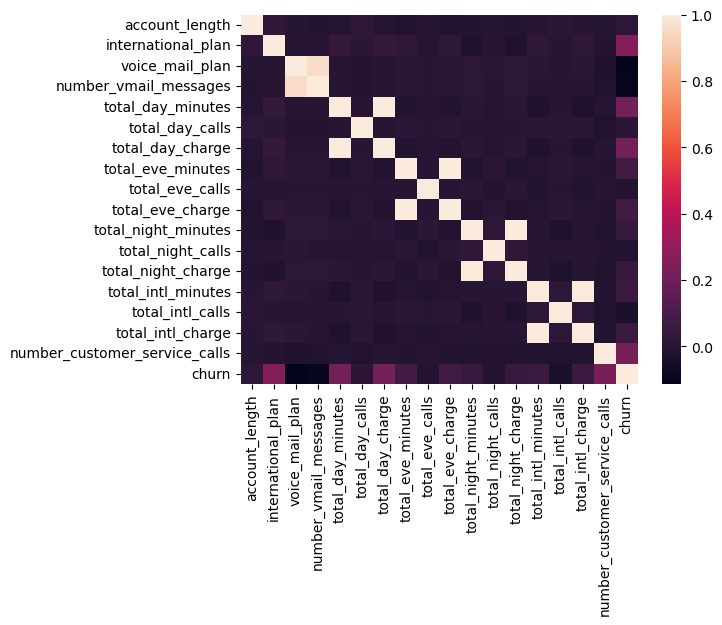

In [7]:
sns.heatmap(train_data.corr())

In [8]:
'''  
From the correlation matrix we can see that some off-diagonal elements have correlation of one and they are 
between parameters like total_eve_minutes and total_eve_charge, which makes sense as the charges must be proportional
to the number of minutes of service used. We can drop these columns and should expect no change in results

'''

train_data.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'],axis=1,inplace=True)
train_data[:10]

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0
1,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0
2,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0
3,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0
4,121,0,1,24,88,37.09,108,29.62,118,9.57,7,2.03,3,0
5,147,1,0,0,79,26.69,94,8.76,96,9.53,6,1.92,0,0
6,117,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,1,0
7,141,1,1,37,84,43.96,111,18.87,97,14.69,5,3.02,0,0
8,65,0,0,0,137,21.95,83,19.42,111,9.40,6,3.43,4,1
9,74,0,0,0,127,31.91,148,13.89,94,8.82,5,2.46,0,0


In [9]:
X = train_data.drop("churn", axis=1)
y = train_data["churn"]

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

In [11]:
'''  
For this classification task we are going to use LazyPredict module to pick the best performing model

'''

clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
model_dictionary = clf.provide_models(X_train, X_test, y_train, y_test)
models

 21%|██        | 6/29 [00:01<00:05,  4.37it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 72%|███████▏  | 21/29 [00:04<00:01,  7.39it/s]

NuSVC model failed to execute
specified nu is infeasible


 93%|█████████▎| 27/29 [00:05<00:00,  5.84it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 29/29 [00:06<00:00,  4.15it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.97,0.90,0.90,0.97,0.74
XGBClassifier,0.96,0.90,0.90,0.96,0.67
BaggingClassifier,0.95,0.87,0.87,0.95,0.24
RandomForestClassifier,0.96,0.86,0.86,0.96,0.79
DecisionTreeClassifier,0.91,0.84,0.84,0.91,0.10
ExtraTreesClassifier,0.93,0.77,0.77,0.93,0.45
SVC,0.93,0.77,0.77,0.92,0.35
NearestCentroid,0.76,0.74,0.74,0.79,0.03
QuadraticDiscriminantAnalysis,0.87,0.72,0.72,0.87,0.04


In [12]:
model = lgb.LGBMClassifier(verbose=0)
model.fit(X_train,y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


LGBMClassifier(verbose=0)

In [13]:
y_test_predicted = model.predict(X_test)

The accuracy score is  96.58823529411765 %


<AxesSubplot:>

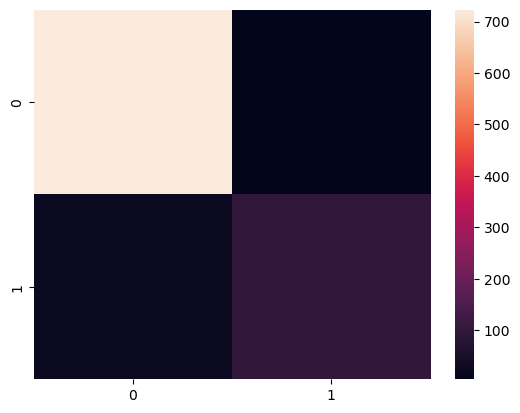

In [14]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test,y_test_predicted)
confusion_matrix = metrics.confusion_matrix(y_test,y_test_predicted)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)

In [15]:
# Saving the model
model.booster_.save_model('customer_churn_predictor')

In [16]:
''' Our validation accuaracy that we got while training was 96.588% '''

test_data.drop(columns=['state', 'area_code'],axis=1,inplace=True)
test_data['international_plan'].replace({'yes':1,'no':0},inplace=True)
test_data['voice_mail_plan'].replace({'yes':1,'no':0},inplace=True)
test_data.drop(columns=['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'],axis=1,inplace=True)
test_data[:10]

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,2,118,1,0,0,98,37.98,101,18.75,118,9.18,6,1.70,0
2,3,62,0,0,0,70,20.52,76,26.11,99,9.14,6,3.54,4
3,4,93,0,0,0,114,32.42,111,18.55,121,5.83,3,2.19,3
4,5,174,0,0,0,76,21.13,112,23.55,115,11.28,5,4.19,3
5,6,142,0,0,0,95,14.42,63,11.62,148,11.27,6,3.83,2
6,7,172,0,0,0,121,36.04,115,2.65,78,13.20,10,3.40,3
7,8,72,0,1,37,80,37.40,102,18.47,71,6.88,6,3.97,3
8,9,149,0,0,0,94,23.87,92,23.10,108,8.47,9,3.00,1
9,10,119,0,0,0,114,27.05,117,19.66,91,6.44,3,2.38,5


In [17]:
x_final_test = test_data.drop(test_data.columns[0],axis=1)
x_final_test

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,118,1,0,0,98,37.98,101,18.75,118,9.18,6,1.70,0
2,62,0,0,0,70,20.52,76,26.11,99,9.14,6,3.54,4
3,93,0,0,0,114,32.42,111,18.55,121,5.83,3,2.19,3
4,174,0,0,0,76,21.13,112,23.55,115,11.28,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,0,0,99,20.30,97,19.24,111,9.12,7,3.05,0
746,73,0,0,0,118,30.12,84,22.99,112,10.88,2,3.32,3
747,152,0,0,0,90,31.31,73,21.83,113,9.61,2,3.97,3
748,61,0,0,0,89,23.90,128,14.69,97,9.56,4,3.67,1


In [18]:
y_final_test_predicted = model.predict(x_final_test)

In [19]:
y_final_test_predicted[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1])